In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
data = pd.read_csv('healthcare.csv', index_col=0)
print("Ilosc rekordow: " + str(data.shape[0]))

Ilosc rekordow: 5110


In [25]:
# jakie typy oraz czy sa jakies null dane
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [26]:
# sprawdzam rozstrzał danych 
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [27]:
# obrobka danych
df = data[data["bmi"].notnull()]
df = df[df["smoking_status"]!="Unknown"]
df = df[df["age"]>=18.0]

#zamiana stringow na liczby
df.loc[df['gender'] == "Male", 'gender'] = 0
df.loc[df['gender'] == "Female", 'gender'] = 1
df.loc[df['gender'] == "Other", 'gender'] = 2

df.loc[df['ever_married'] == "No", 'ever_married'] = 0
df.loc[df['ever_married'] == "Yes", 'ever_married'] = 1

df.loc[df['work_type'] == "Private", 'work_type'] = 0
df.loc[df['work_type'] == "Self-employed", 'work_type'] = 1
df.loc[df['work_type'] == "Govt_job", 'work_type'] = 2
df.loc[df['work_type'] == "children", 'work_type'] = 3
df.loc[df['work_type'] == "Never_worked", 'work_type'] = 4

df.loc[df['Residence_type'] == "Urban", 'Residence_type'] = 0
df.loc[df['Residence_type'] == "Rural", 'Residence_type'] = 1

df.loc[df['smoking_status'] == "smokes", 'smoking_status'] = 0
df.loc[df['smoking_status'] == "never smoked", 'smoking_status'] = 1
df.loc[df['smoking_status'] == "formerly smoked", 'smoking_status'] = 2

# funkcja normalizująca
def normalize(column):
    normalized_df=(df[column]-df[column].min())/(df[column].max()-df[column].min())
    df[column] = normalized_df
    
normalize('avg_glucose_level')
normalize('bmi')

df['ever_married'] = df['ever_married'].astype(int)
df['work_type'] = df['work_type'].astype(int)
df['ever_married'] = df['ever_married'].astype(int)
df['smoking_status'] = df['gender'].astype(int)
df['Residence_type'] = df['Residence_type'].astype(int)
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [28]:
print("Ilosc wierszy po obrobce danych: " + str(df.shape[0]))

Ilosc wierszy po obrobce danych: 3256


In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature = ['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
X = df[feature]
y = df['ever_married']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

print("Trening: " + str(len(y_train)))
print("Ever married: " + str(len(y_train[y_train == 1])))
print("Rest: " + str(len(y_train[y_train == 0])))

print("\nTest: " + str(len(y_test)))
print("IEver married: " + str(len(y_test[y_test == 1])))
print("Rest: " + str(len(y_test[y_test == 0])))

Trening: 2181
Ever married: 1731
Rest: 450

Test: 1075
IEver married: 868
Rest: 207


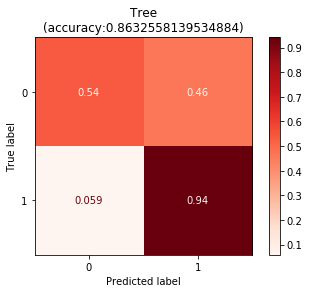

In [31]:
from sklearn.tree import DecisionTreeClassifier
drzewo = DecisionTreeClassifier(criterion='gini', max_depth=3)
drzewo.fit(X_train, y_train)


pred = drzewo.predict(X_test)
tree_class = metrics.accuracy_score(pred , y_test)
tree_class

metrics.plot_confusion_matrix(drzewo, X_test, y_test, cmap='Reds', normalize='true')
plt.title("Tree" + "\n(accuracy:" + str(tree_class) + ")")
plt.show()

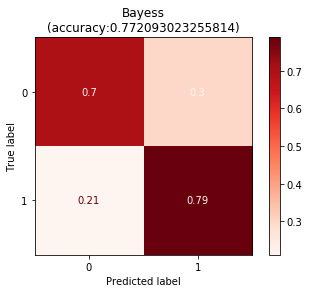

In [32]:
from sklearn.naive_bayes import GaussianNB
 
naive_bayes = GaussianNB()
 
naive_bayes.fit(X_train , y_train)
y_predicted = naive_bayes.predict(X_test)
naive_bayess = metrics.accuracy_score(y_predicted , y_test)
naive_bayess

metrics.plot_confusion_matrix(naive_bayes, X_test, y_test, cmap='Reds', normalize='true')
plt.title("Bayess" + "\n(accuracy:" + str(naive_bayess) + ")")
plt.show()

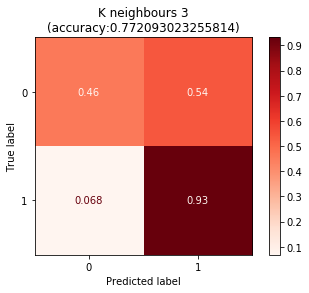

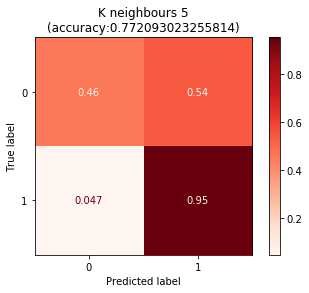

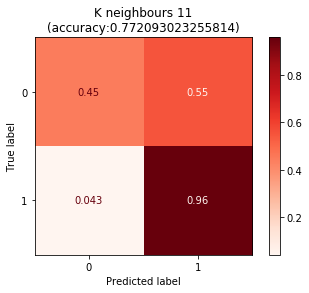

[0.8409302325581396, 0.8576744186046512, 0.8595348837209302]


In [33]:
from sklearn.neighbors import KNeighborsClassifier
k = [3, 5, 11]
kneigh = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    acc = metrics.accuracy_score(pred , y_test)
    kneigh.append(acc)
    metrics.plot_confusion_matrix(knn, X_test, y_test, cmap='Reds', normalize='true')
    plt.title("K neighbours " + str(i) + "\n(accuracy:" + str(naive_bayess) + ")")
    plt.show()
print(kneigh)

In [34]:
def addlabels(x,y):
    for i in range(len(x)):
        y[i] = float(format(y[i], ".5f"))
        plt.text(i, y[i] + 0.01, y[i], ha = 'center')

Najlepiej dzialajacy klasyfikator: Drzewa decyzyjne
Accuracy: 0.8632558139534884
[0.8632558139534884, 0.772093023255814, 0.8409302325581396, 0.8576744186046512, 0.8595348837209302]


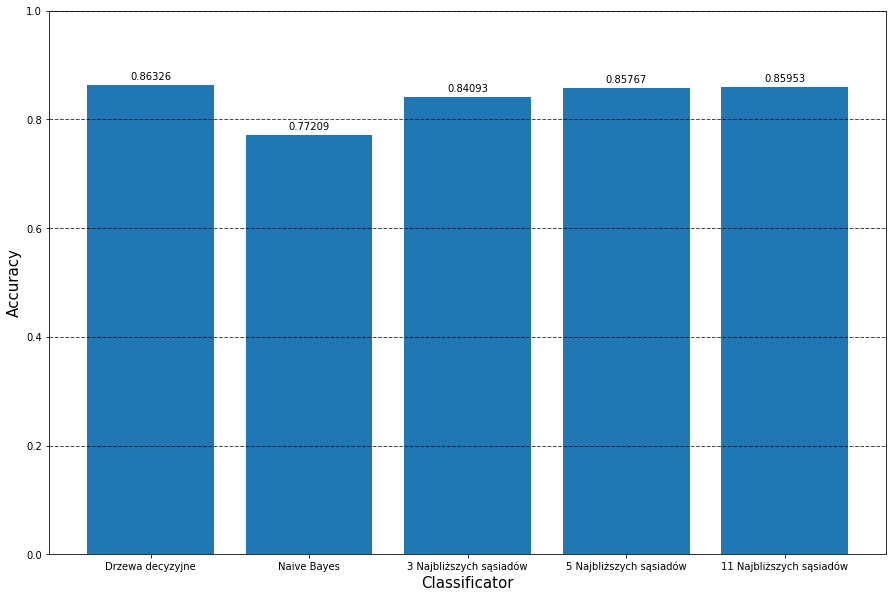

In [35]:
x = ["Drzewa decyzyjne", "Naive Bayes", "3 Najbliższych sąsiadów", "5 Najbliższych sąsiadów", "11 Najbliższych sąsiadów"]
y = [tree_class, naive_bayess]

for i in kneigh:
    y.append(i)

maxV = (y[0], 0)
for i in range(1, len(y)):
    if y[i] > maxV[0]:
        maxV = (y[i], i)
    


print("Najlepiej dzialajacy klasyfikator: " + x[maxV[1]])
print("Accuracy: " + str(maxV[0]))
print(y)

plt.figure(figsize=(15,10))
plt.grid(color='000000', linestyle='--', linewidth=1, axis='y', alpha=0.7)
addlabels(x, y)
plt.ylim(top=1) #ymax is your value
plt.ylim(bottom=0) #ymin is your value
plt.xlabel('Classificator', size=15)
plt.ylabel('Accuracy', size=15)
plt.bar(x, y)
plt.show()

age


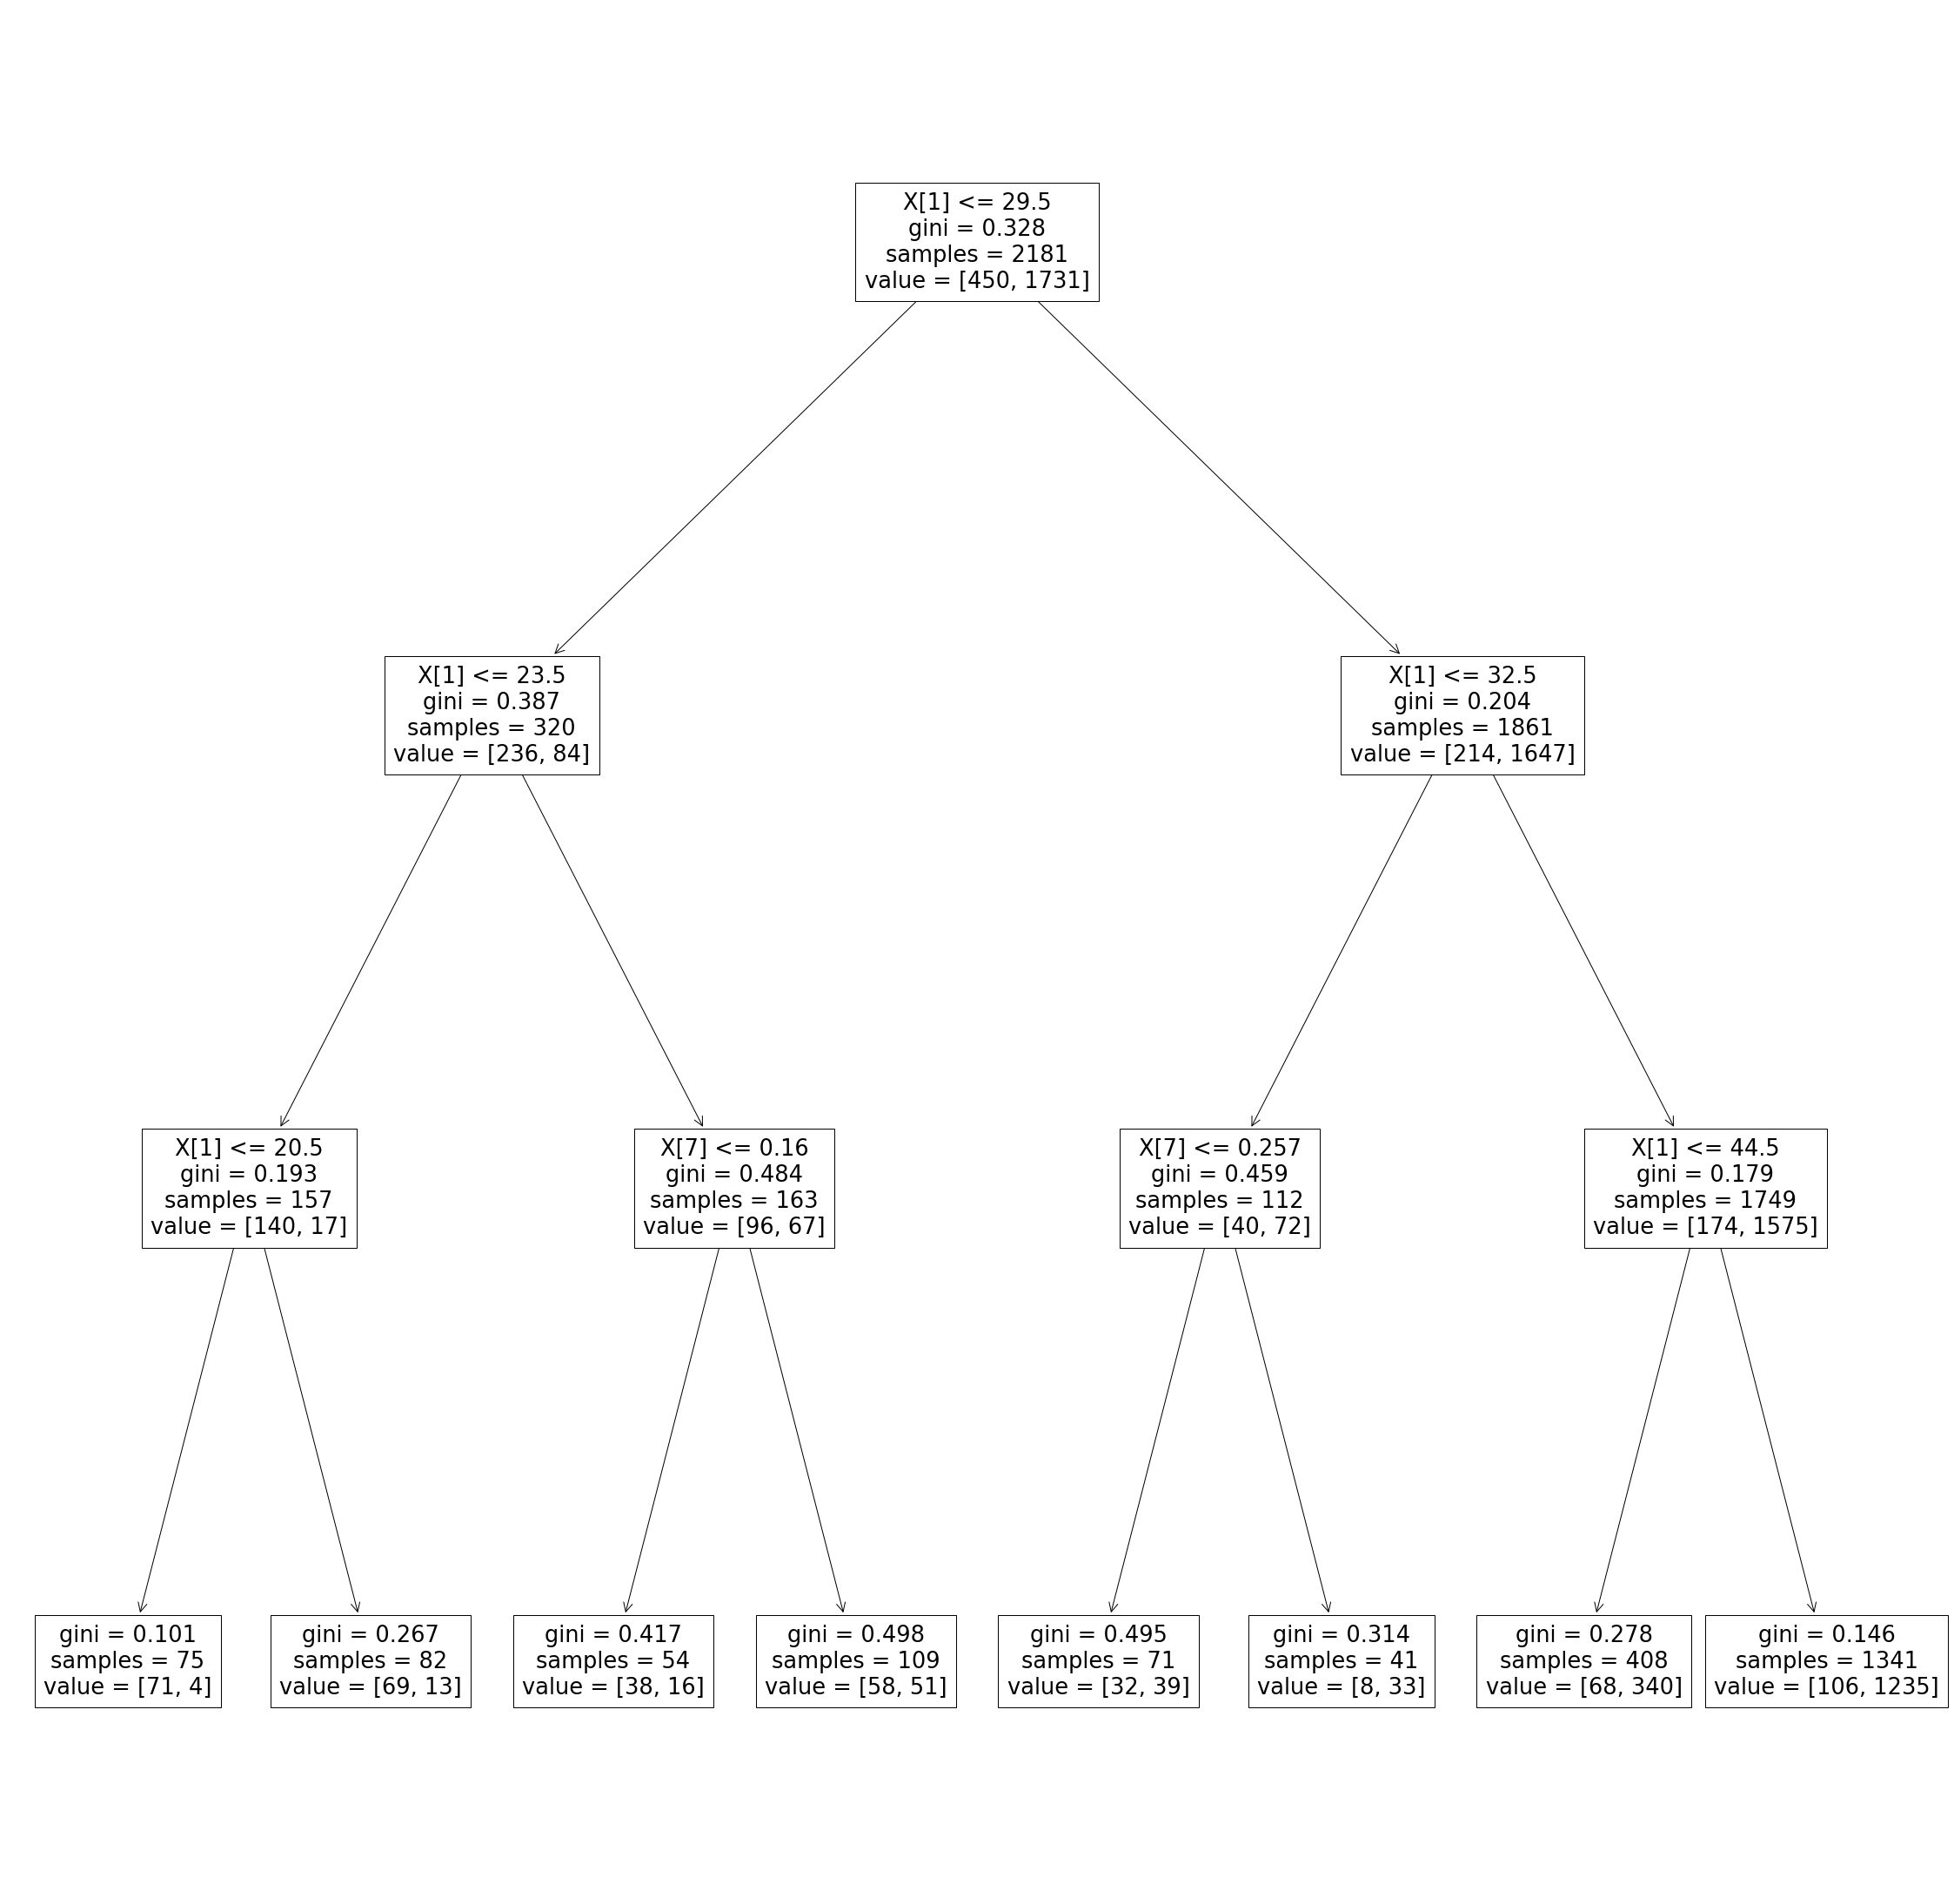

In [36]:
from sklearn import tree
print(feature[1])
plt.figure(figsize=(40,40))
tree.plot_tree(drzewo)
plt.show()


In [37]:
def treeAcc(X_train, X_test, y_train, y_test):
    drzewo = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
    drzewo.fit(X_train, y_train)

    pred = drzewo.predict(X_test)
    tree_class = metrics.accuracy_score(pred , y_test)
    
    return tree_class
    
def naiveGauss(X_train, X_test, y_train, y_test):
    naive_bayes.fit(X_train , y_train)
    y_predicted = naive_bayes.predict(X_test)
    naive_bayess = metrics.accuracy_score(y_predicted , y_test)
    
    return naive_bayess
    
def kNeighbours(X_train, X_test, y_train, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    kneigh = metrics.accuracy_score(pred , y_test)

    return kneigh

In [38]:
results = {'tree': [],
           'gauss': [],
           'kneighbours3': [],
           'kneighbours5': [],
           'kneighbours11': []}

for i in range(20, 51):
    feature = ['gender', 'age', 'hypertension', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
    X = df[feature]
    y = df['heart_disease']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, shuffle=True)
    
    results['tree'].append((treeAcc(X_train, X_test, y_train, y_test),i))
    results['gauss'].append((naiveGauss(X_train, X_test, y_train, y_test),i))
    results['kneighbours3'].append([kNeighbours(X_train, X_test, y_train, y_test, 3),i])
    results['kneighbours5'].append([kNeighbours(X_train, X_test, y_train, y_test, 5),i])
    results['kneighbours11'].append([kNeighbours(X_train, X_test, y_train, y_test, 11),i])

In [39]:
def plotResults(name):
    y = []
    x = []
    maxe = results[name][0][0]
    per = 0
    for i in range(0, len(results[name])):
        if results[name][i][0] > maxe:
            maxe = results[name][i][0]
            per = results[name][i][1]
        y.append(results[name][i][0])
        x.append(results[name][i][1])
    
    print("Dla " + name + " najlepszy podzial to: " + str(per) + " z dokladnoscia " + str(maxe))
    
    plt.figure(figsize=(15,10))
    plt.title(name)
    plt.ylim(top=1) #ymax is your value
    plt.ylim(bottom=0.8) #ymin is your value
    plt.grid(color='000000', linestyle='--', linewidth=1, axis='y', alpha=0.7)
    plt.xlabel('% of data', size=15)
    plt.ylabel('Accuracy', size=15)
    colors = []
    for i in range(20, 51):
        if i == per:
            colors.append('tab:orange')
        else:
            colors.append('tab:blue')
    
    per = float(format(per, ".2f"))
    plt.text(per, maxe + 0.005, float(format(maxe, ".5f")), ha = 'center')
    plt.bar(x, y, color=colors)
    plt.plot(x, y, color='tab:red')
    plt.show()

def checkMaxAcc(name):
    maxe = results[name][0][0]
    per = 0
    for i in range(0, len(results[name])):
        if results[name][i][0] > maxe:
            maxe = results[name][i][0]
            per = results[name][i][1]
    
    return maxe, per

Dla tree najlepszy podzial to: 22 z dokladnoscia 0.9442119944211994


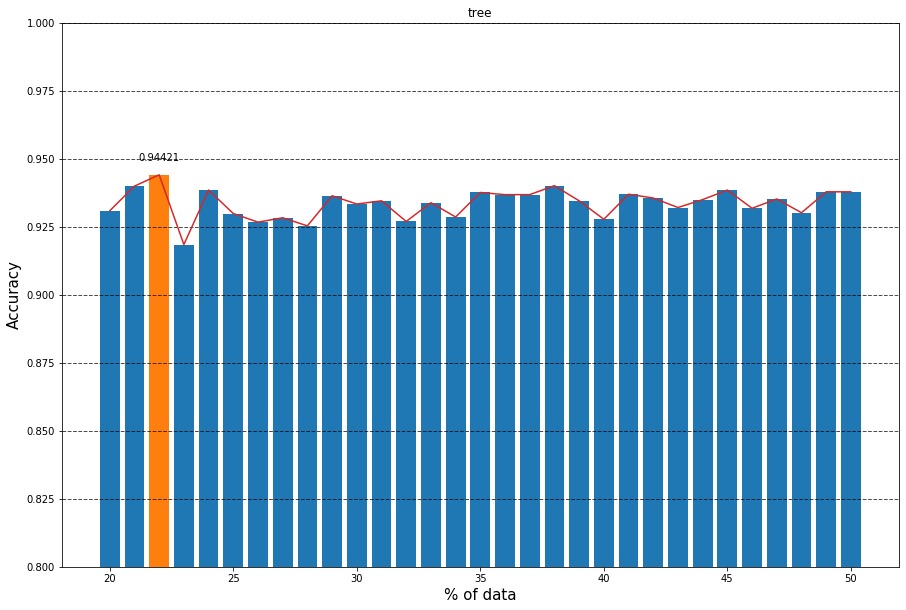

In [40]:
plotResults('tree')

Dla gauss najlepszy podzial to: 33 z dokladnoscia 0.8995348837209303


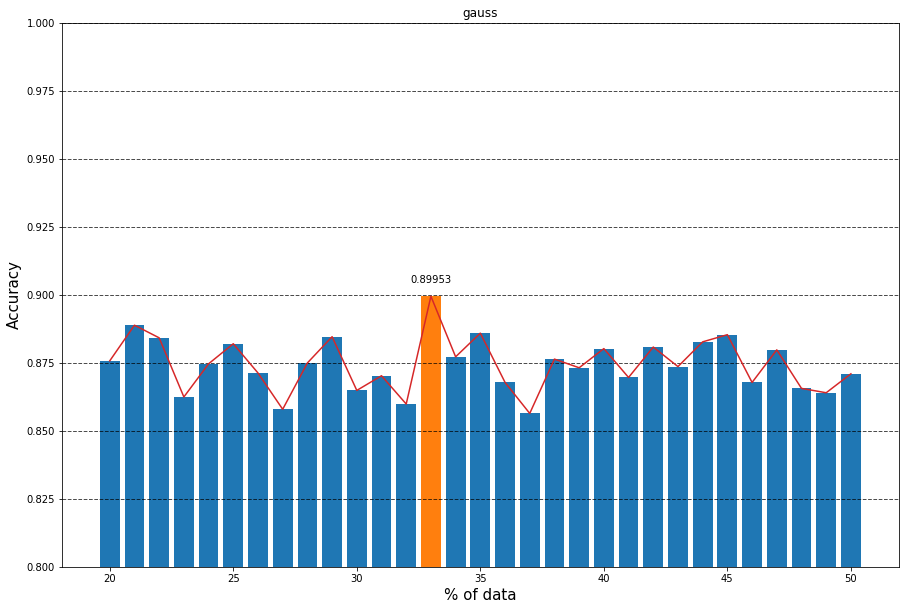

In [41]:
plotResults('gauss')

Dla kneighbours3 najlepszy podzial to: 24 z dokladnoscia 0.9322250639386189


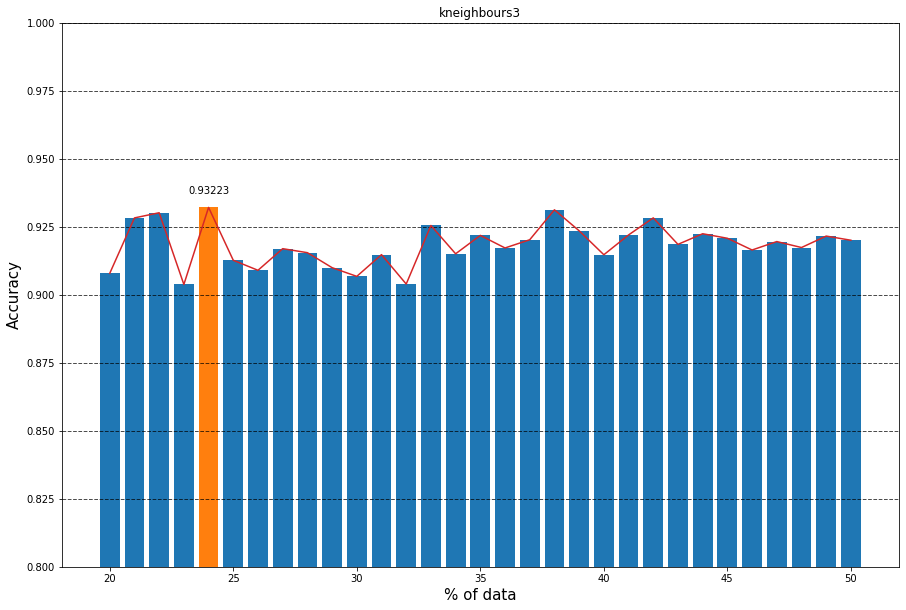

In [42]:
plotResults('kneighbours3')

Dla kneighbours5 najlepszy podzial to: 22 z dokladnoscia 0.9400278940027894


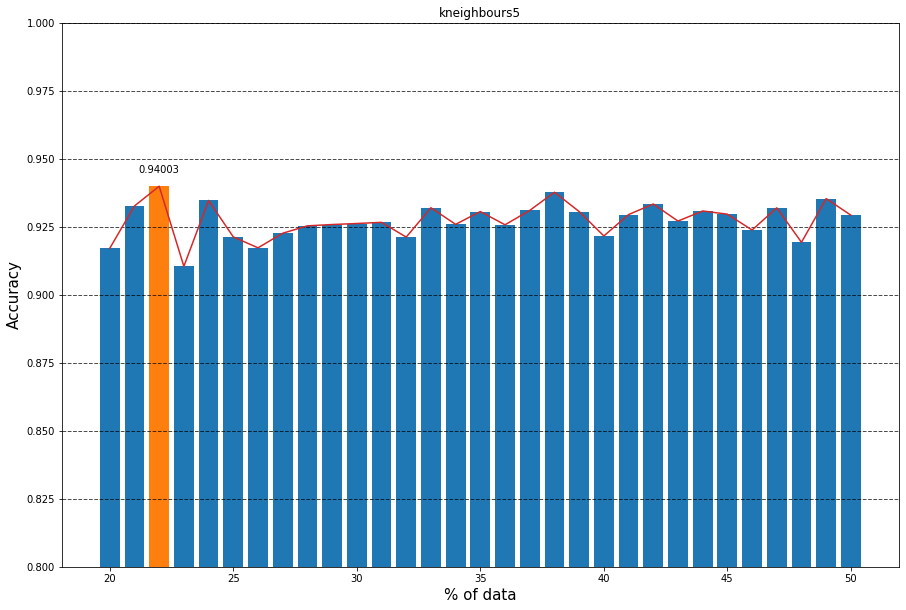

In [43]:
plotResults('kneighbours5')

Dla kneighbours11 najlepszy podzial to: 22 z dokladnoscia 0.9428172942817294


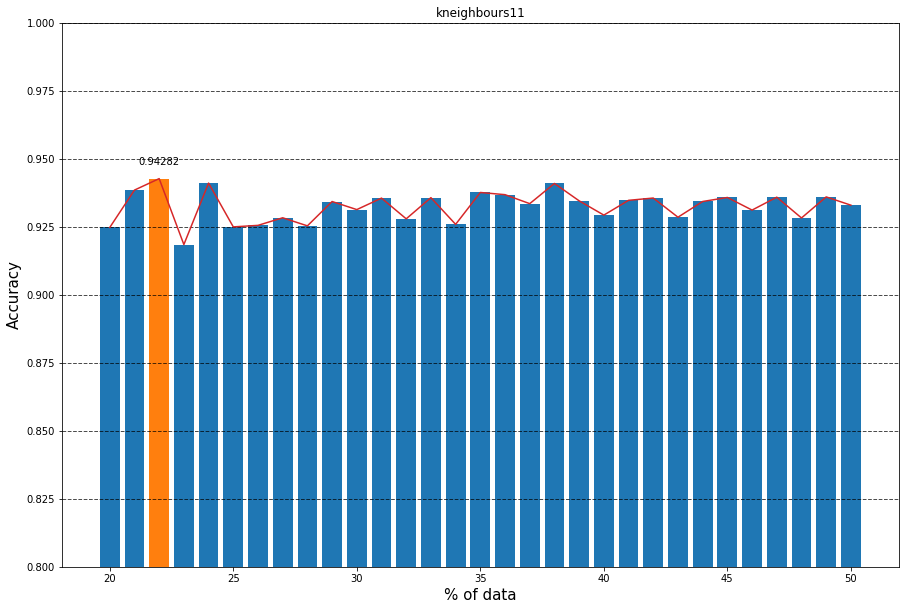

In [44]:
plotResults('kneighbours11')

In [45]:
yTree, xTree = checkMaxAcc('tree')
yGauss, xGauss = checkMaxAcc('gauss')
yNeigh3, xNeigh3 = checkMaxAcc('kneighbours3')
yNeigh5, xNeigh5 = checkMaxAcc('kneighbours5')
yNeigh11, xNeigh11 = checkMaxAcc('kneighbours11')
yNeigh11, xNeigh11

(0.9428172942817294, 22)

In [46]:
def addlabels2(x,y,y2):
    for i in range(len(x)):
        y[i] = float(format(y[i], ".5f"))
        plt.text(i, y[i] + 0.003, y[i], ha = 'center', size=15)
        plt.text(i, y[i] - 0.01, y2[i], ha = 'center', color='white', size=15, weight=600)

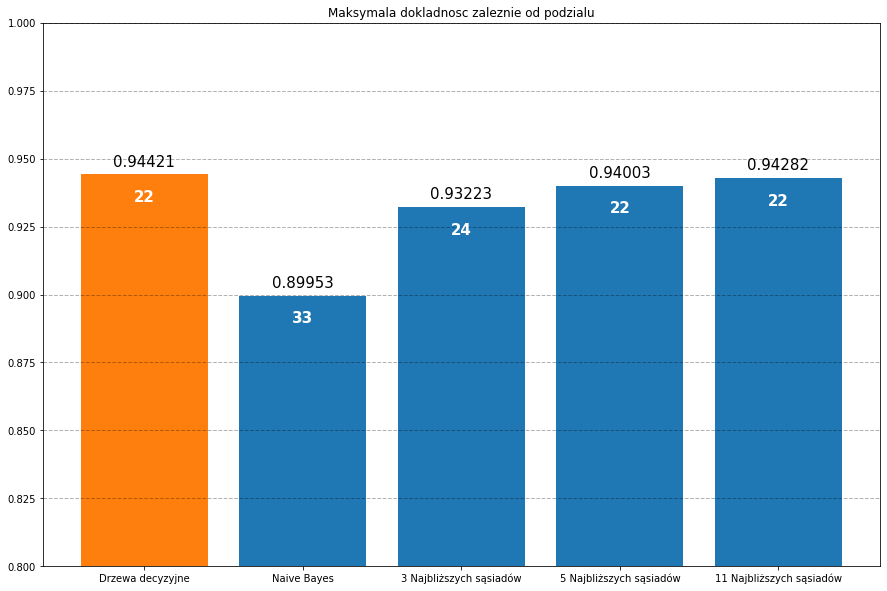

In [47]:
x = ["Drzewa decyzyjne", "Naive Bayes", "3 Najbliższych sąsiadów", "5 Najbliższych sąsiadów", "11 Najbliższych sąsiadów"]
y = [yTree, yGauss, yNeigh3, yNeigh5, yNeigh11]
y2 = [xTree, xGauss, xNeigh3, xNeigh5, xNeigh11]
plt.figure(figsize=(15,10))
plt.title('Maksymala dokladnosc zaleznie od podzialu')
plt.ylim(top=1) #ymax is your value
plt.ylim(bottom=0.8) #ymin is your value
plt.grid(color='000000', linestyle='--', linewidth=1, axis='y', alpha=0.3)

colors = []
for i in range(0, 5):
    if y[i] == max(y):
        colors.append('tab:orange')
    else:
        colors.append('tab:blue')
        
plt.bar(x, y, color=colors)
addlabels2(x, y,y2)
plt.show()